## Import 

In [12]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import numpy as np

## Extraction d'un jeu de donnees

In [2]:
from modules.splitting import Splitting

TRAIN_DATA_DIR = '../datas/RAW/train_apple_bee'

Splitting.copie_dossiers(
    '../datas/RAW/train',
    ['apple', 'bee'],
    500,
    True
)

Le dossier c:\Users\utilisateur\Documents\datas\RAW\train_apple_bee existe déjà !


## Chargement des images

In [3]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

# Taille d'image
TRAIN_IMAGE_SIZE = 32
# NB d'images envoyées à la fois
TRAIN_BATCH_SIZE = 64

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    )
 
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR, # same directory as training data
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Creation du modele

- convolution
- dense
- pooling

In [4]:
model = Sequential()

# Version de Maxime
# Conv2D()16
# mp
# de 16
# c 32
# mp
# de 32
# c 64

model.add(MaxPooling2D( pool_size=(2,2), input_shape=(32,32,3) ))
model.add(Conv2D(32, kernel_size=3, activation='relu' ))

model.add(Dense(32, activation='relu'))
# model.add(Conv2D(64, kernel_size=3, activation='relu' ))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d (MaxPooling2D) (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        896       
_________________________________________________________________
dense (Dense)                (None, 14, 14, 32)        1056      
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12546     
Total params: 14,498
Trainable params: 14,498
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit(train_generator, epochs=15, validation_data=validation_generator);

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 4 steps
Epoch 1/15
13/13 [==============================] - 4s 274ms/step - loss: 57.6160 - accuracy: 0.5450 - val_loss: 5.5780 - val_accuracy: 0.7200
Epoch 2/15
13/13 [==============================] - 2s 135ms/step - loss: 12.1958 - accuracy: 0.6600 - val_loss: 7.5932 - val_accuracy: 0.6700
Epoch 3/15
13/13 [==============================] - 2s 159ms/step - loss: 3.8088 - accuracy: 0.8062 - val_loss: 2.9662 - val_accuracy: 0.8050
Epoch 4/15
13/13 [==============================] - 2s 162ms/step - loss: 2.0723 - accuracy: 0.8537 - val_loss: 2.4145 - val_accuracy: 0.8150
Epoch 5/15
13/13 [==============================] - 2s 146ms/step - loss: 1.6078 - accuracy: 0.8650 - val_loss: 2.5147 - val_accuracy: 0.7950
Epoch 6/15
13/13 [==============================] - 2s 138ms/step - loss: 1.0470 - accuracy: 0.9000 - val_loss: 2.0161 - val_accuracy: 0.7950
Epoch 7/15
13/13 [==============================] - 2s 

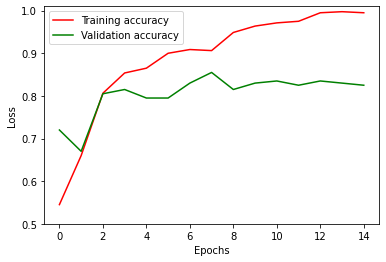

In [6]:
plt.plot(training.history['accuracy'], color='red', label='Training accuracy')
plt.plot(training.history['val_accuracy'],  color='green', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.ylim((.5,1.01))

plt.show()

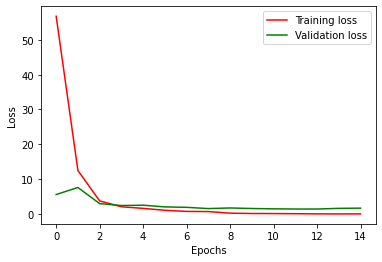

In [7]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

## Sauvegarde du modele

In [8]:
model_name = 'model.h5'

model.save(model_name)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d (MaxPooling2D) (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        896       
_________________________________________________________________
dense (Dense)                (None, 14, 14, 32)        1056      
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12546     
Total params: 14,498
Trainable params: 14,498
Non-trainable params: 0
_________________________________________________________________


## Affichage des couches du modele

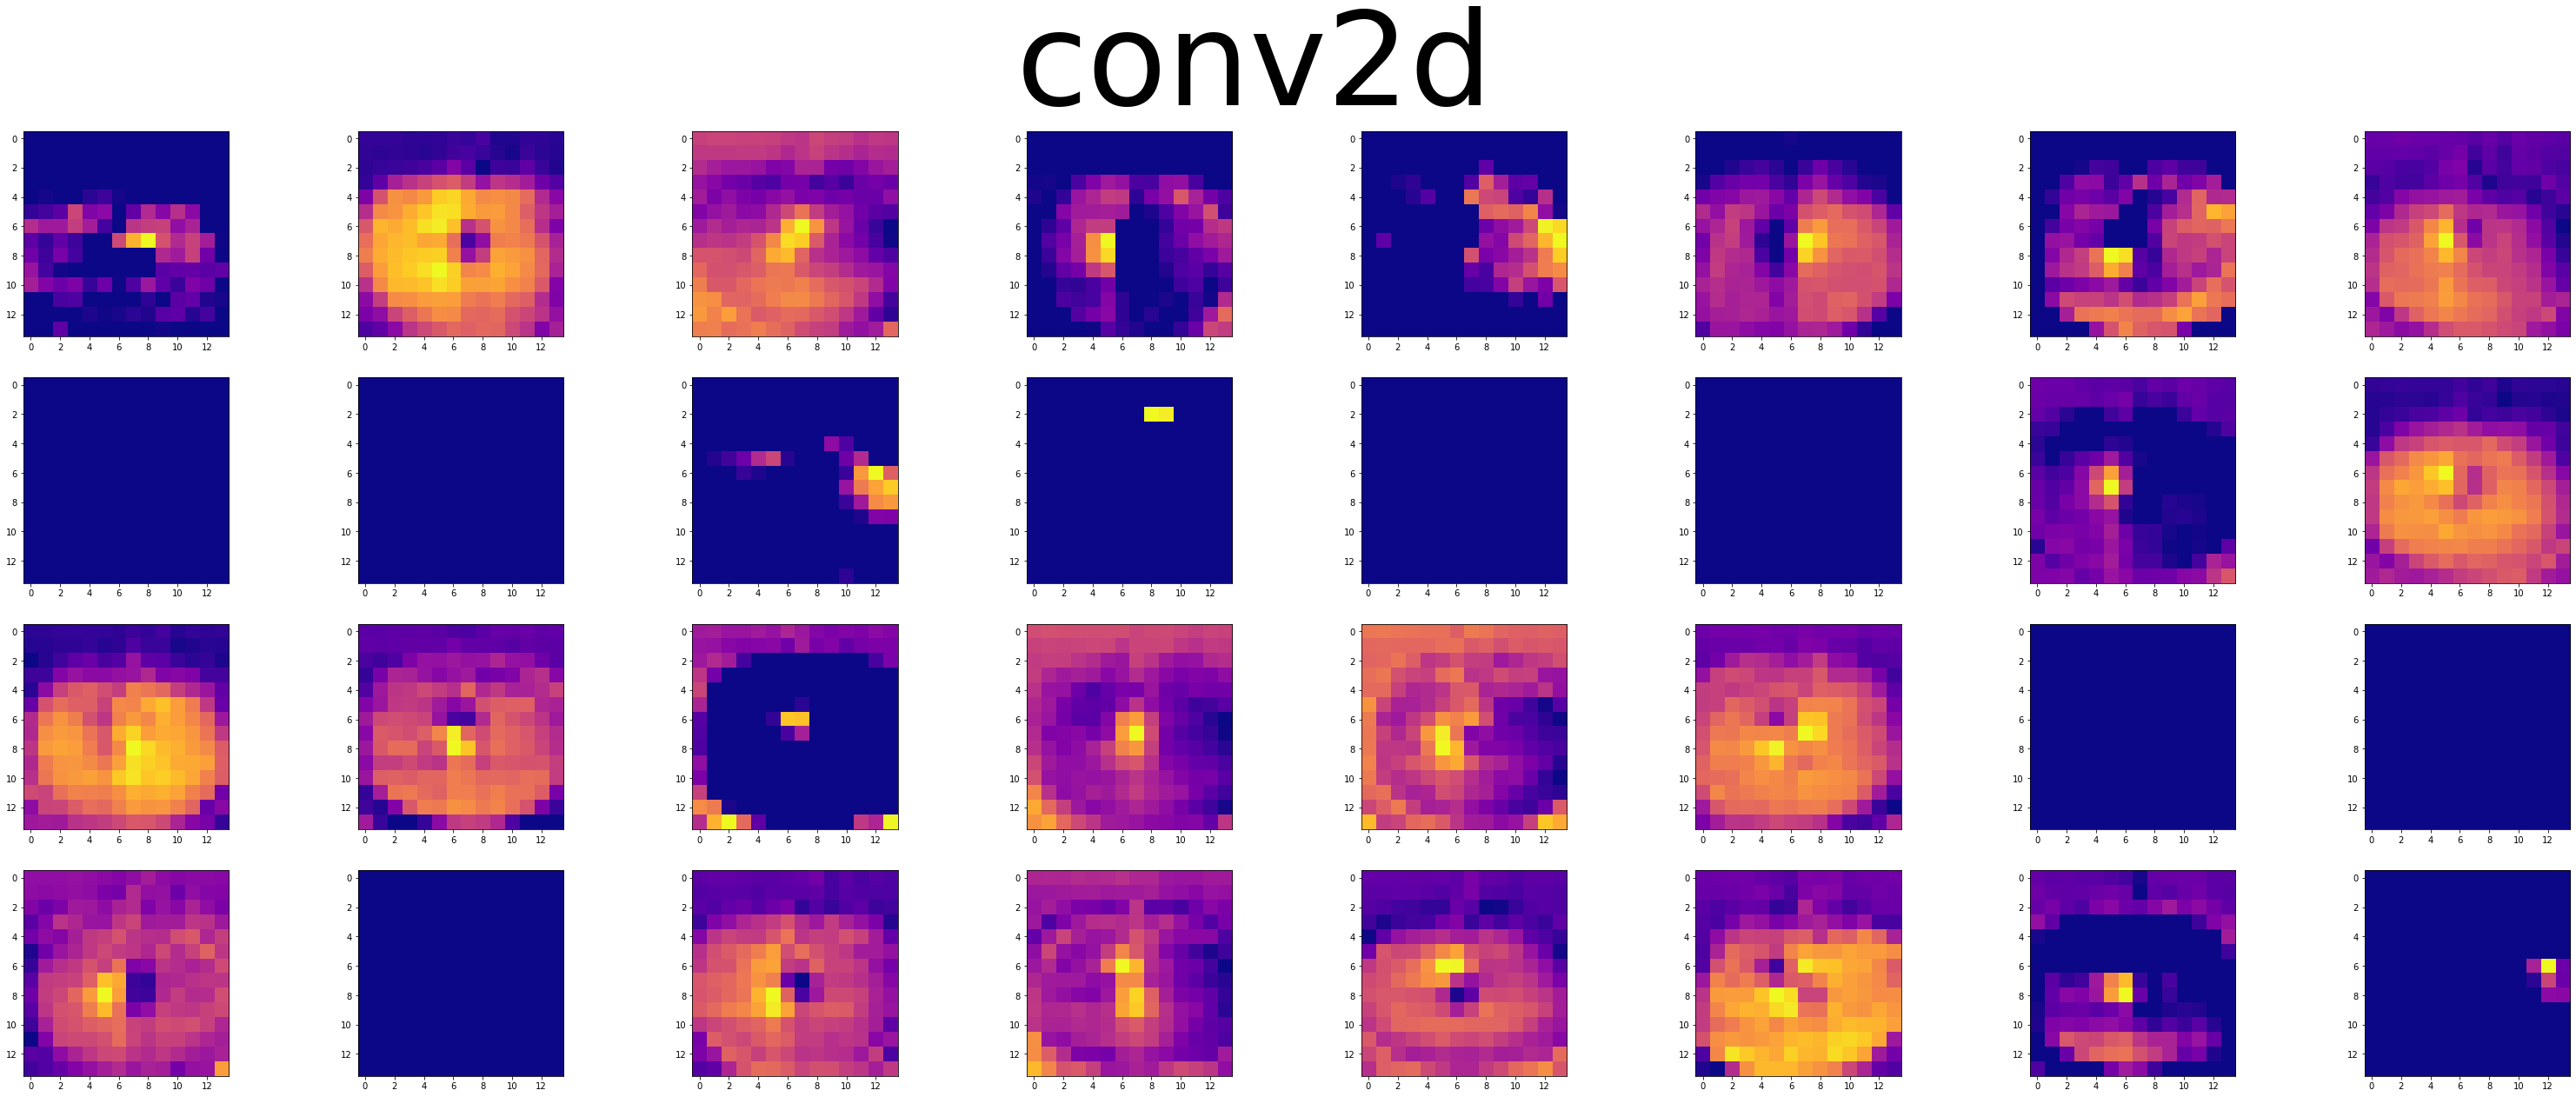

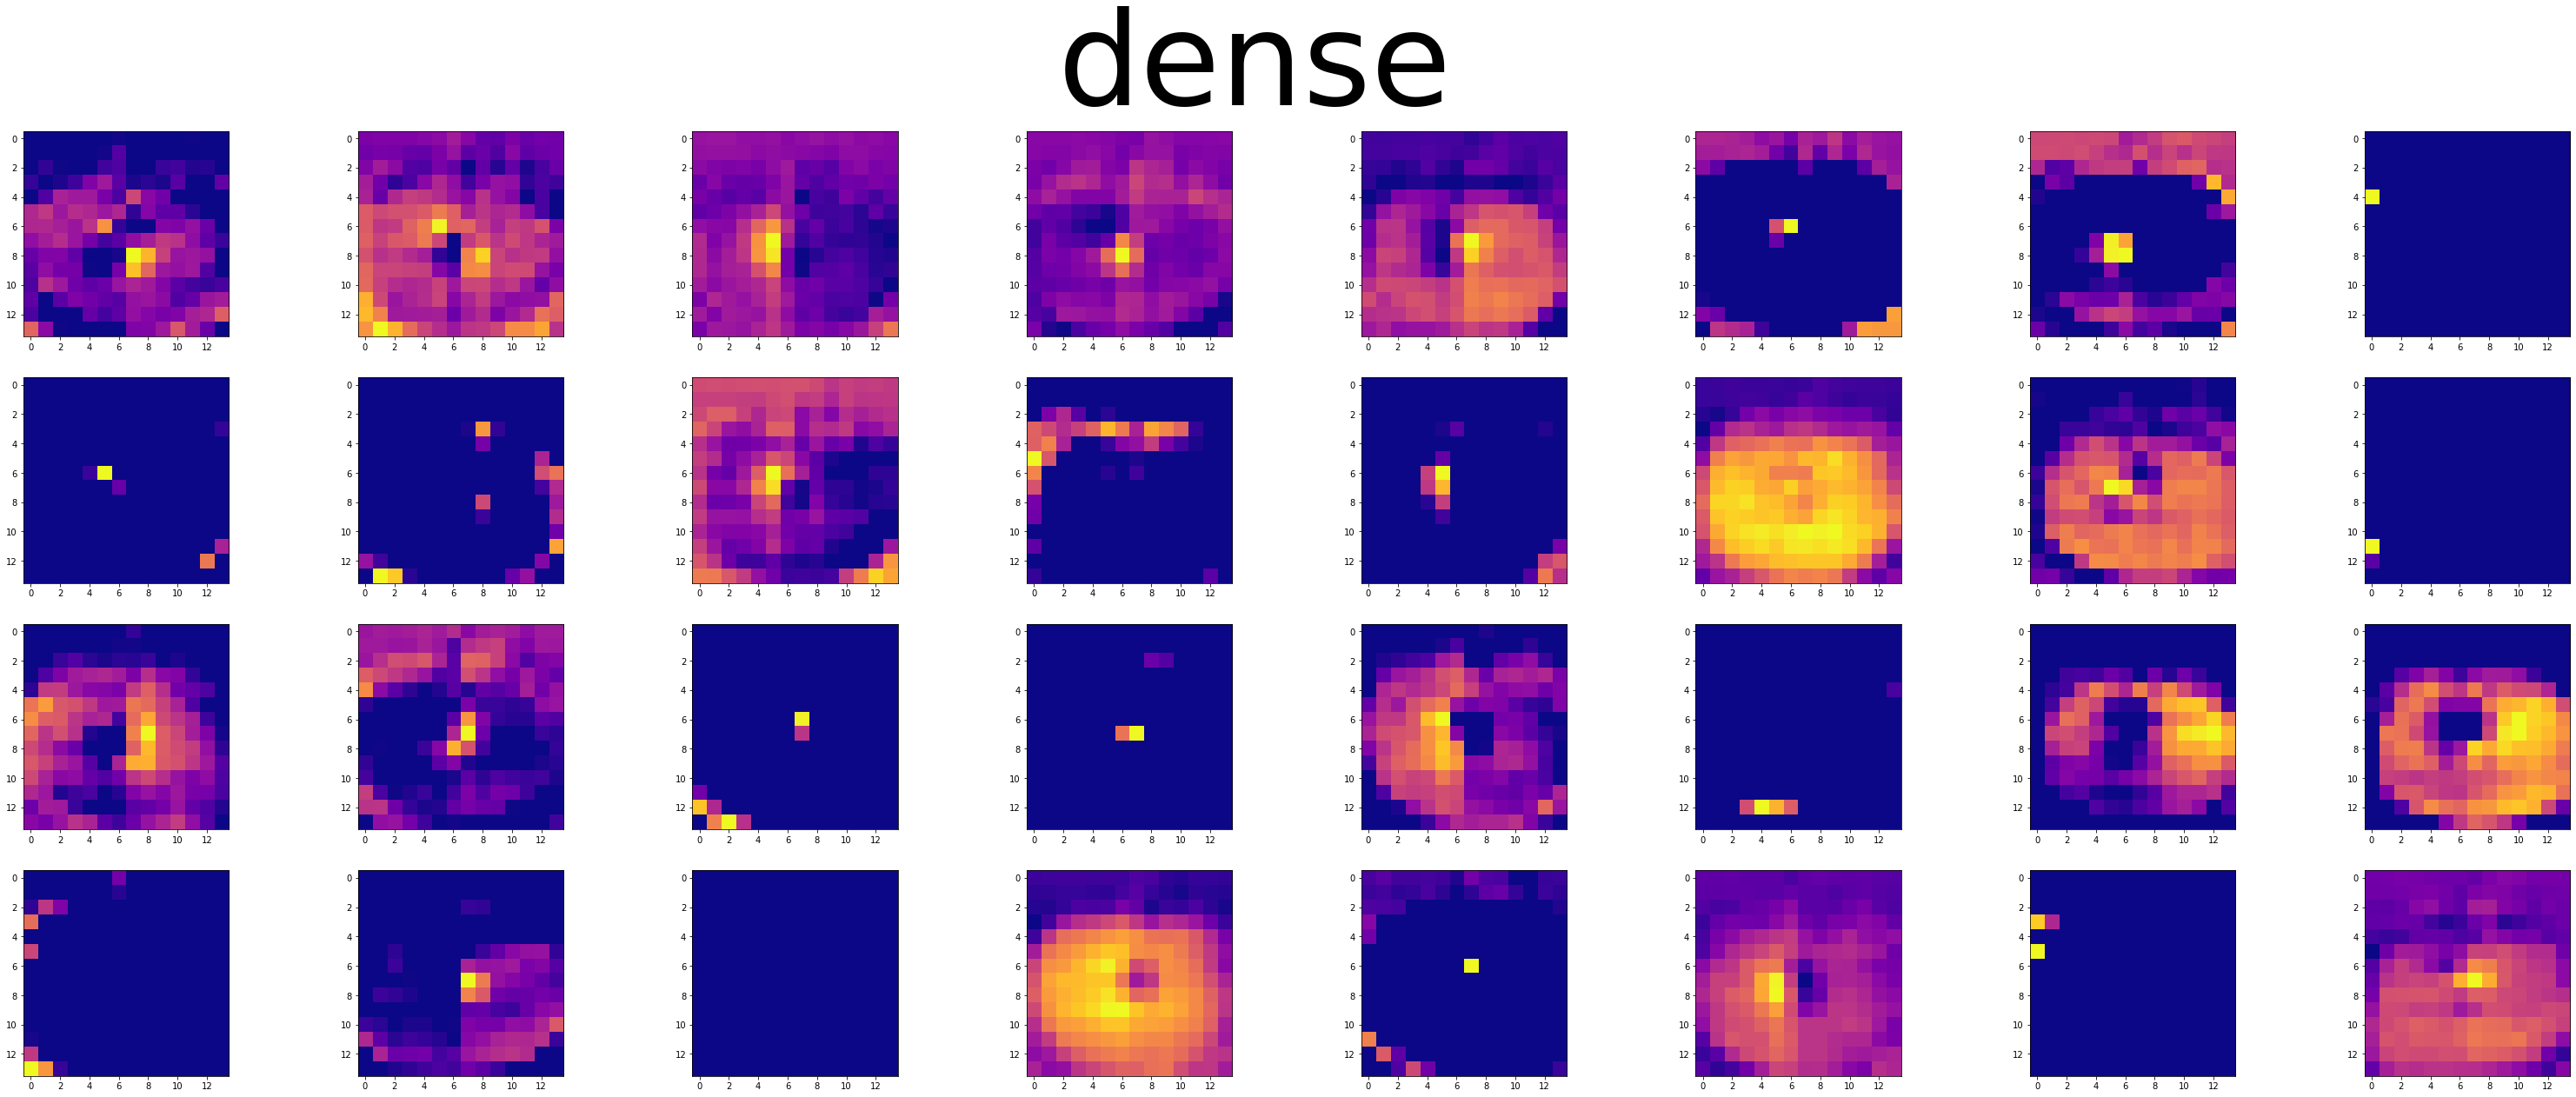

In [9]:
from modules.observation_modele import plot_layer

img = "../datas/RAW/train/apple/0020.png"
# plt.imshow(plt.imread(image))

# plot_layer(model, image, 0)
plot_layer(model, img, 1)
plot_layer(model, img, 2)

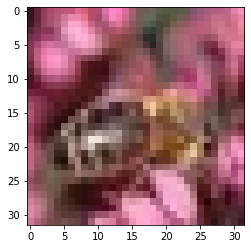

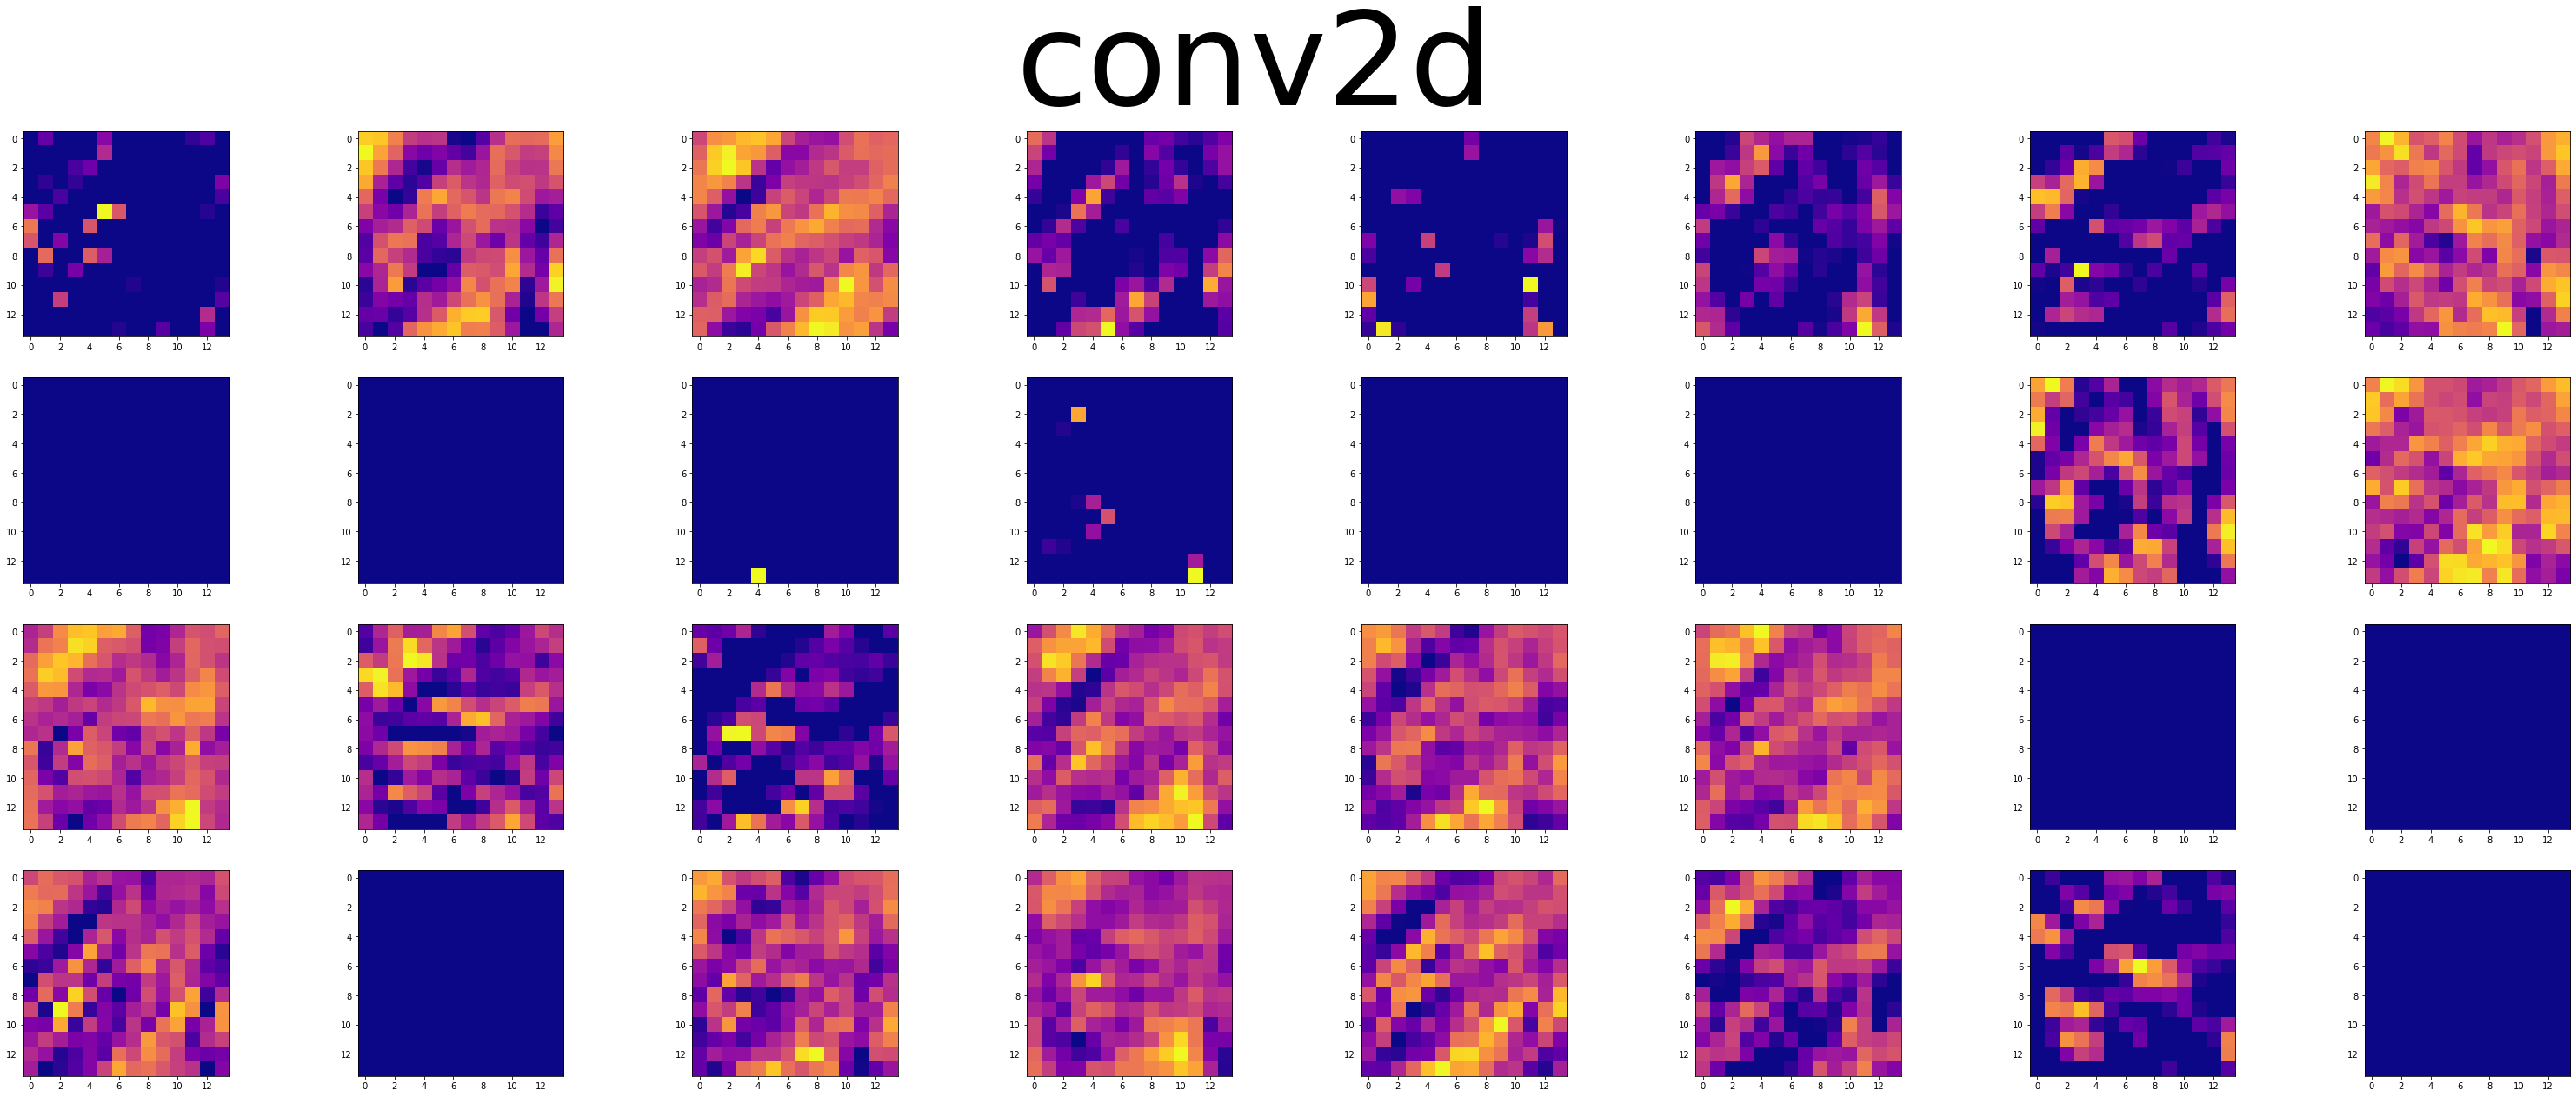

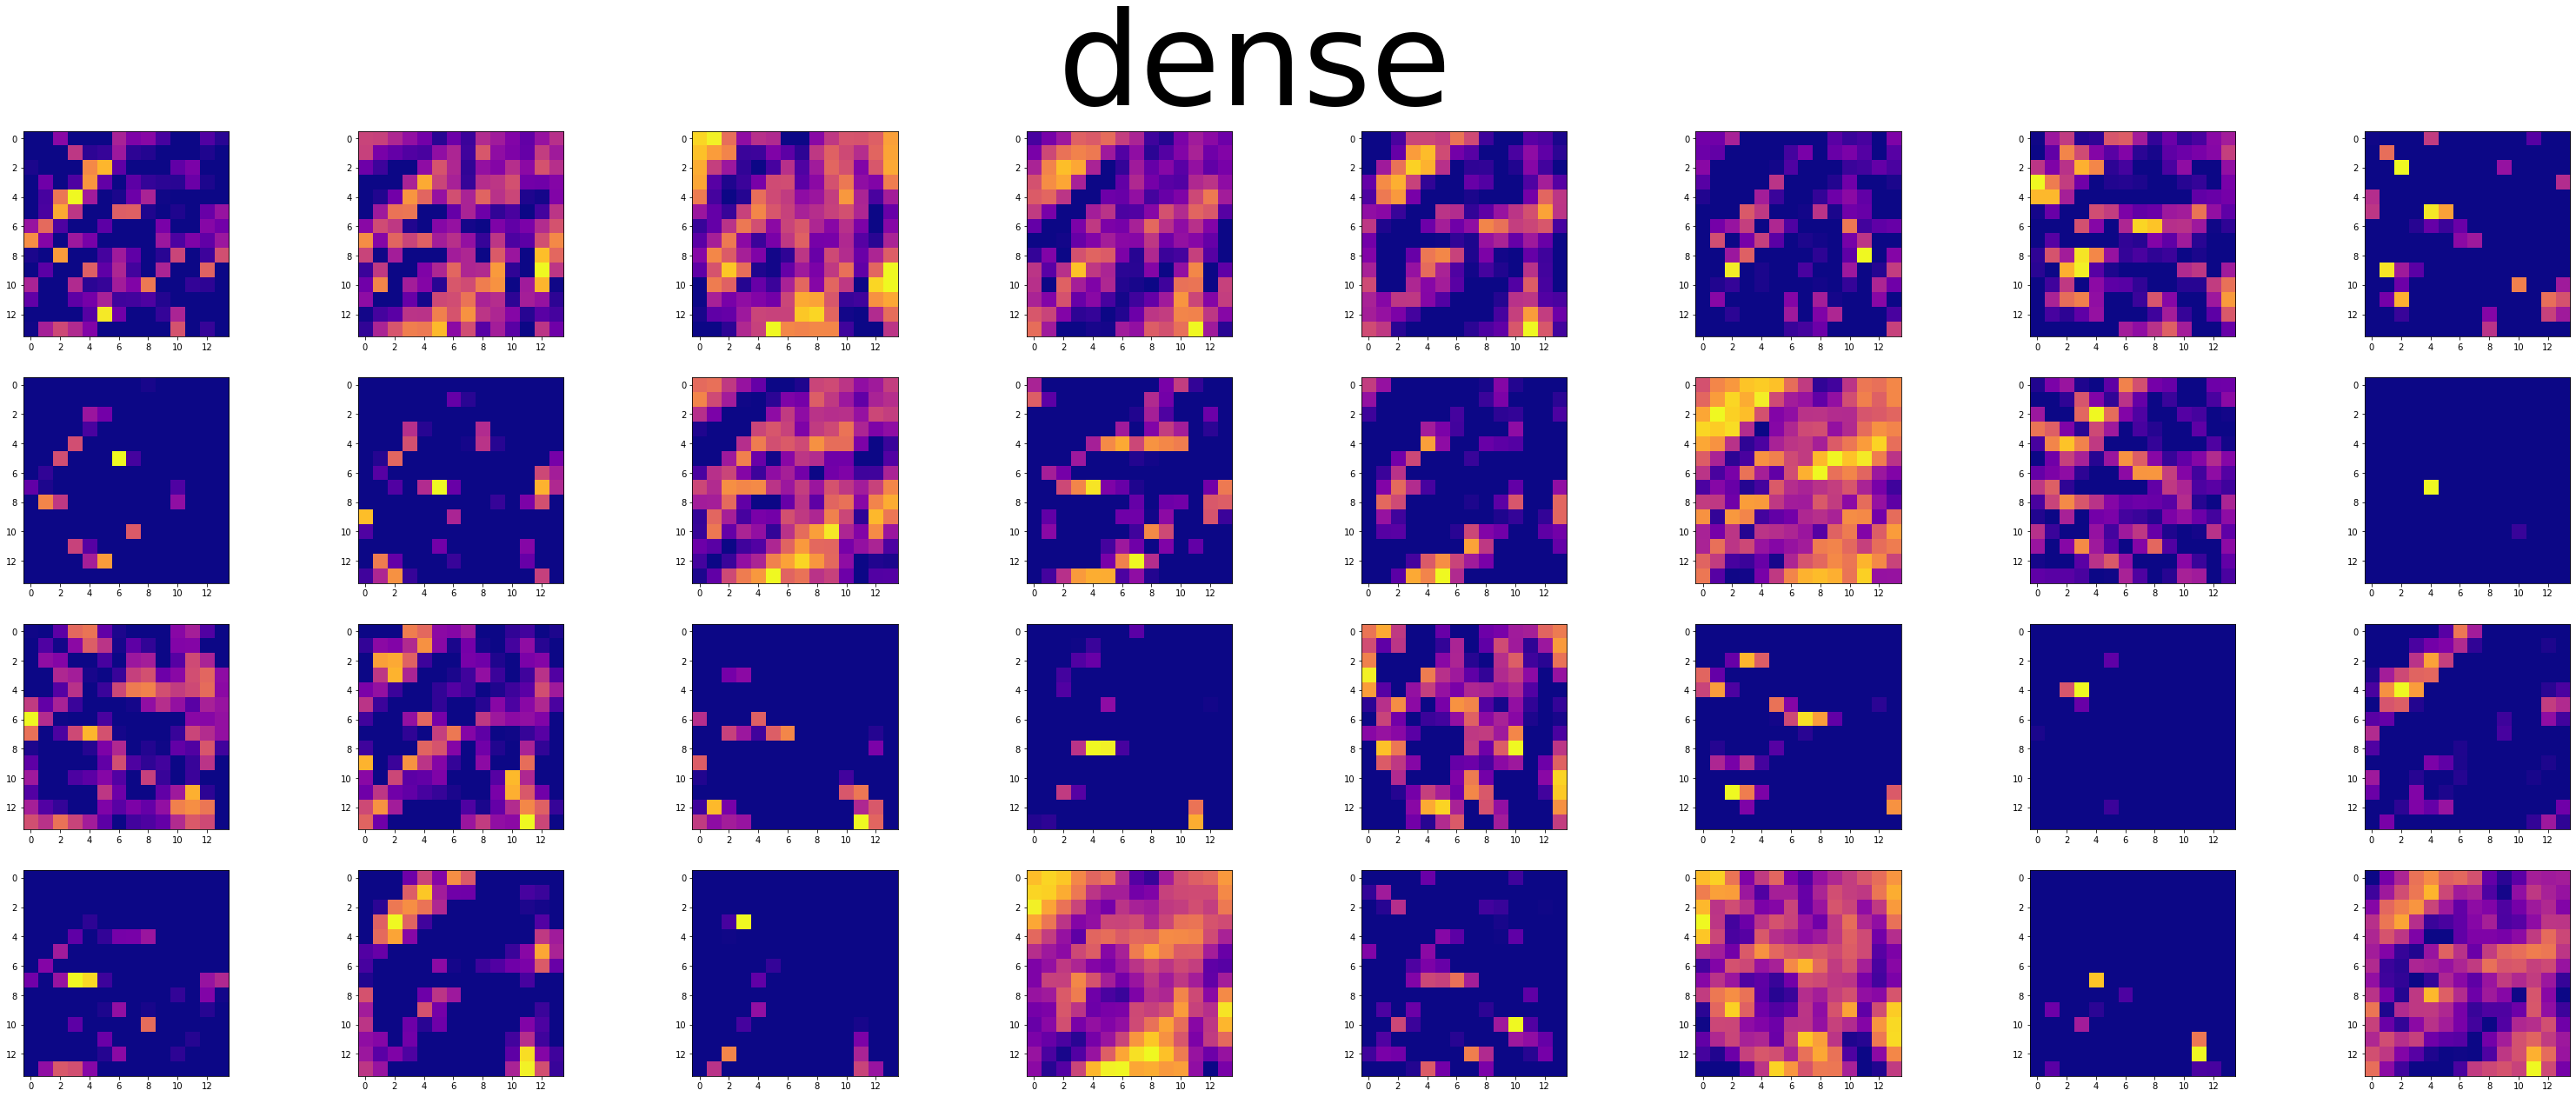

In [10]:
from modules.observation_modele import plot_layer

img = "../datas/RAW/train/bee/0103.png"
plt.imshow(plt.imread(image))

# plot_layer(model, image, 0)
plot_layer(model, img, 1)
plot_layer(model, img, 2)
